In [2]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
import distutils
import cv2
from sklearn import metrics
from tensorflow import keras

In [3]:
# fetch the training file
file_path_20_percent = '../input/nslkdd/KDDTrain+_20Percent.txt'
file_path_full_training_set = '../input/nslkdd/KDDTrain+.txt'
file_path_test = '../input/nslkdd/KDDTest+.txt' 

#df = pd.read_csv(file_path_20_percent)
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [4]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

# sanity check
print(df.shape)
print(test_df.shape)

(125972, 43)
(22543, 43)


In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [7]:
set(df['protocol_type'])

{'icmp', 'tcp', 'udp'}

In [8]:
set(df['attack'])

{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'loadmodule',
 'multihop',
 'neptune',
 'nmap',
 'normal',
 'perl',
 'phf',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'spy',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [9]:
set(df['service'])

{'IRC',
 'X11',
 'Z39_50',
 'aol',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'harvest',
 'hostnames',
 'http',
 'http_2784',
 'http_443',
 'http_8001',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'red_i',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tftp_u',
 'tim_i',
 'time',
 'urh_i',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois'}

In [10]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [11]:
# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

In [12]:
# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [13]:
set(df['attack_map'])

{0, 1, 2, 3, 4}

In [14]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(df[numeric_features])
test_set = test_final.join(test_df[numeric_features])

In [15]:
multi_y = df['attack_map']
test_multi_y = test_df['attack_map']

In [16]:
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(to_fit, multi_y, test_size = 0.3)

In [17]:
print(multi_train_X.shape)
print(multi_val_X.shape)
print(multi_train_y.shape)
print(multi_val_y.shape)

(88180, 87)
(37792, 87)
(88180,)
(37792,)


**KNN - K nearest neighbors**
****

In [18]:
import sklearn

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(multi_train_X, multi_train_y)

KNeighborsClassifier()

In [20]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

In [21]:
y_pred_knn = knn.predict(multi_val_X)

In [22]:
#print('Precision                                   : %.3f'%precision_score(multi_val_y, y_pred))
#print('Recall                                      : %.3f'%recall_score(multi_val_y, y_pred))
#print('F1-Score                                    : %.3f'%f1_score(multi_val_y, y_pred))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(multi_val_y, y_pred_knn))
print('\nClassification Report                       : ')
print(classification_report(multi_val_y, y_pred_knn))


Precision Recall F1-Score Support Per Class : 
 (array([0.99321076, 0.98064222, 0.81820382, 1.        , 0.9442623 ]), array([0.9910988 , 0.94154519, 0.95507205, 0.23529412, 0.97959184]), array([0.99215366, 0.96069609, 0.88135593, 0.38095238, 0.96160267]), array([20222, 13720,  3539,    17,   294]))

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20222
           1       0.98      0.94      0.96     13720
           2       0.82      0.96      0.88      3539
           3       1.00      0.24      0.38        17
           4       0.94      0.98      0.96       294

    accuracy                           0.97     37792
   macro avg       0.95      0.82      0.84     37792
weighted avg       0.97      0.97      0.97     37792



In [23]:
import matplotlib.pyplot as plt

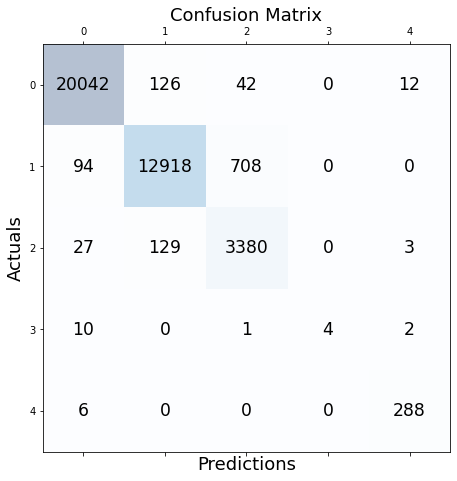

In [24]:
conf_matrix = sklearn.metrics.confusion_matrix(y_true=multi_val_y, y_pred=y_pred_knn)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [25]:
print(f1_score(multi_val_y, y_pred_knn, average="macro"))
print(precision_score(multi_val_y, y_pred_knn, average="macro"))
print(recall_score(multi_val_y, y_pred_knn, average="macro"))  

0.8353521471514028
0.9472638212430488
0.8205204002844585


**RANDOM FOREST**
****

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(multi_train_X, multi_train_y)

RandomForestClassifier()

In [27]:
y_pred_rf = rf.predict(multi_val_X)
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(multi_val_y, y_pred_rf))
print('\nClassification Report                       : ')
print(classification_report(multi_val_y, y_pred_rf))


Precision Recall F1-Score Support Per Class : 
 (array([0.99617771, 0.94870726, 0.98544839, 0.66666667, 0.98961938]), array([0.99238453, 0.99489796, 0.82283131, 0.58823529, 0.97278912]), array([0.9942775 , 0.97125374, 0.89682784, 0.625     , 0.98113208]), array([20222, 13720,  3539,    17,   294]))

Classification Report                       : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     20222
           1       0.95      0.99      0.97     13720
           2       0.99      0.82      0.90      3539
           3       0.67      0.59      0.62        17
           4       0.99      0.97      0.98       294

    accuracy                           0.98     37792
   macro avg       0.92      0.87      0.89     37792
weighted avg       0.98      0.98      0.98     37792



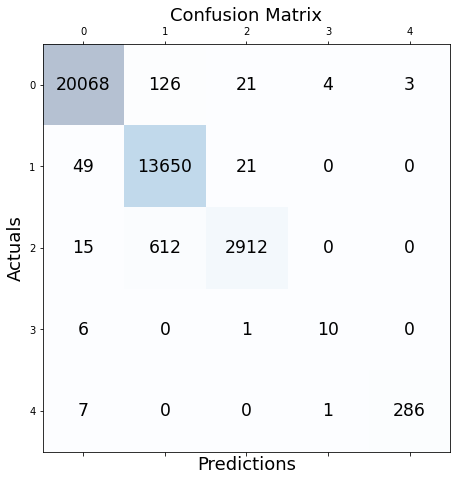

In [28]:
conf_matrix = sklearn.metrics.confusion_matrix(y_true=multi_val_y, y_pred=y_pred_rf)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
print(f1_score(multi_val_y, y_pred_rf, average="macro"))
print(precision_score(multi_val_y, y_pred_rf, average="macro"))
print(recall_score(multi_val_y, y_pred_rf, average="macro"))  

0.8936982312097536
0.9173238808043918
0.8742276417849808


**DECISION TREE**
****

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(multi_train_X, multi_train_y)

DecisionTreeClassifier()

In [31]:
y_pred_dt = dt.predict(multi_val_X)
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(multi_val_y, y_pred_dt))
print('\nClassification Report                       : ')
print(classification_report(multi_val_y, y_pred_dt))


Precision Recall F1-Score Support Per Class : 
 (array([0.99622473, 0.94839203, 0.98676171, 0.54545455, 0.97635135]), array([0.99174167, 0.9951895 , 0.82141848, 0.70588235, 0.9829932 ]), array([0.99397814, 0.97122737, 0.89653045, 0.61538462, 0.97966102]), array([20222, 13720,  3539,    17,   294]))

Classification Report                       : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     20222
           1       0.95      1.00      0.97     13720
           2       0.99      0.82      0.90      3539
           3       0.55      0.71      0.62        17
           4       0.98      0.98      0.98       294

    accuracy                           0.98     37792
   macro avg       0.89      0.90      0.89     37792
weighted avg       0.98      0.98      0.98     37792



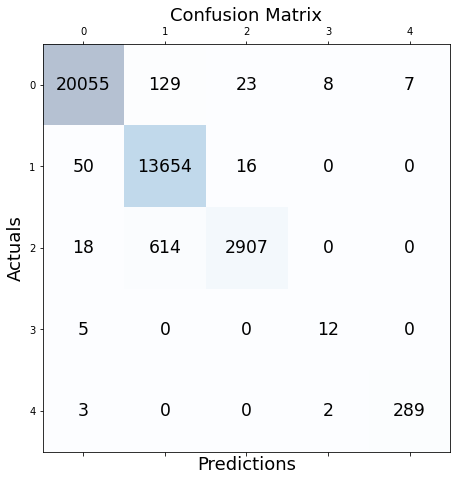

In [32]:
conf_matrix = sklearn.metrics.confusion_matrix(y_true=multi_val_y, y_pred=y_pred_dt)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [33]:
print(f1_score(multi_val_y, y_pred_dt, average="macro"))
print(precision_score(multi_val_y, y_pred_dt, average="macro"))
print(recall_score(multi_val_y, y_pred_dt, average="macro"))  

0.8913563202919736
0.8906368723496282
0.8994450403761342


**LOGISTIC REGRESSION**
****

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=500)
lr.fit(multi_train_X, multi_train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(max_iter=500, solver='liblinear')

In [35]:
y_pred_lr = lr.predict(multi_val_X)
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(multi_val_y, y_pred_lr))
print('\nClassification Report                       : ')
print(classification_report(multi_val_y, y_pred_lr))


Precision Recall F1-Score Support Per Class : 
 (array([0.83800167, 0.89757928, 0.87188612, 0.        , 0.        ]), array([0.99124716, 0.88913994, 0.0692286 , 0.        , 0.        ]), array([0.90820534, 0.89333968, 0.12827225, 0.        , 0.        ]), array([20222, 13720,  3539,    17,   294]))

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     20222
           1       0.90      0.89      0.89     13720
           2       0.87      0.07      0.13      3539
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00       294

    accuracy                           0.86     37792
   macro avg       0.52      0.39      0.39     37792
weighted avg       0.86      0.86      0.82     37792



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


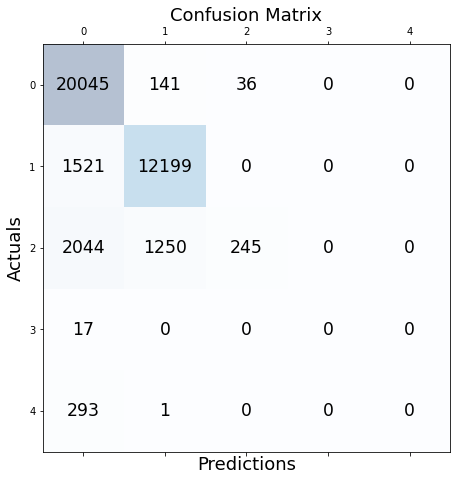

In [36]:
conf_matrix = sklearn.metrics.confusion_matrix(y_true=multi_val_y, y_pred=y_pred_lr)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [37]:
print(f1_score(multi_val_y, y_pred_lr, average="macro"))
print(precision_score(multi_val_y, y_pred_lr, average="macro"))
print(recall_score(multi_val_y, y_pred_lr, average="macro"))

0.3859634537223582
0.521493414728679
0.3899231387803221


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(seems to be a problem with logistic reg)

**GAUSSIAN NB**
****

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(multi_train_X, multi_train_y)

GaussianNB()

In [39]:
y_pred_nb = nb.predict(multi_val_X)
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(multi_val_y, y_pred_nb))
print('\nClassification Report                       : ')
print(classification_report(multi_val_y, y_pred_nb))


Precision Recall F1-Score Support Per Class : 
 (array([0.76382306, 0.39703275, 0.4457429 , 0.00150905, 0.01941748]), array([0.04781921, 0.97915452, 0.07544504, 0.17647059, 0.00680272]), array([0.09000372, 0.56497603, 0.12904785, 0.00299252, 0.01007557]), array([20222, 13720,  3539,    17,   294]))

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.76      0.05      0.09     20222
           1       0.40      0.98      0.56     13720
           2       0.45      0.08      0.13      3539
           3       0.00      0.18      0.00        17
           4       0.02      0.01      0.01       294

    accuracy                           0.39     37792
   macro avg       0.33      0.26      0.16     37792
weighted avg       0.59      0.39      0.27     37792



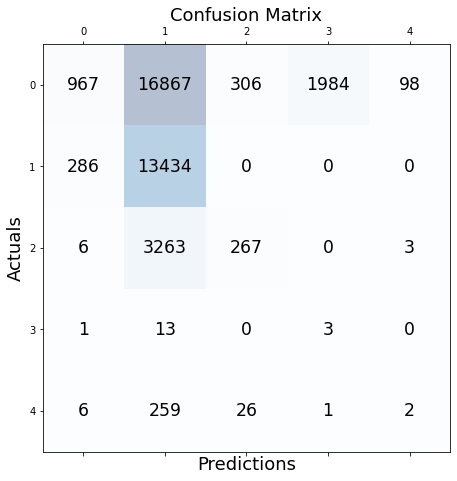

In [40]:
conf_matrix = sklearn.metrics.confusion_matrix(y_true=multi_val_y, y_pred=y_pred_nb)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [41]:
print(f1_score(multi_val_y, y_pred_nb, average="macro"))
print(precision_score(multi_val_y, y_pred_nb, average="macro"))
print(recall_score(multi_val_y, y_pred_nb, average="macro"))

0.15941913718519873
0.3255050491707876
0.25713841521013264


**SVM**
****

In [42]:
#from sklearn.svm import SVC
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
#svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#svc.fit(multi_train_X, multi_train_y)

#not working

**SGD**
****

In [43]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(multi_train_X, multi_train_y)

SGDClassifier()

In [44]:
y_pred_sgd = sgd.predict(multi_val_X)
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(multi_val_y, y_pred_sgd))
print('\nClassification Report                       : ')
print(classification_report(multi_val_y, y_pred_sgd))


Precision Recall F1-Score Support Per Class : 
 (array([0.40462178, 0.        , 0.15932125, 0.        , 0.        ]), array([0.46236772, 0.        , 0.58632382, 0.        , 0.        ]), array([0.43157166, 0.        , 0.25055847, 0.        , 0.        ]), array([20222, 13720,  3539,    17,   294]))

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.40      0.46      0.43     20222
           1       0.00      0.00      0.00     13720
           2       0.16      0.59      0.25      3539
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00       294

    accuracy                           0.30     37792
   macro avg       0.11      0.21      0.14     37792
weighted avg       0.23      0.30      0.25     37792



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


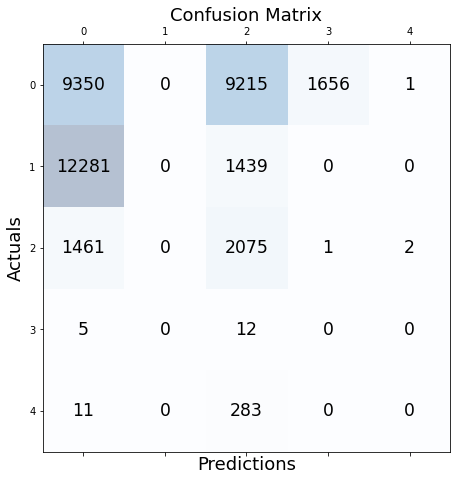

In [45]:
conf_matrix = sklearn.metrics.confusion_matrix(y_true=multi_val_y, y_pred=y_pred_sgd)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [46]:
print(f1_score(multi_val_y, y_pred_sgd, average="macro"))
print(precision_score(multi_val_y, y_pred_sgd, average="macro"))
print(recall_score(multi_val_y, y_pred_sgd, average="macro"))

0.13642602661297326
0.11278860581591237
0.20973830772295843


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#Also doesn't seem to be working